# Matplotlib
Matplotlit je základní knihovna pro zobrazování dat, vytváření grafů. Asi není nejlepší, ale velmi často se používá.

Existují další knihovny, které nabízí jiné grafy, funkcionalitu. Později si vyzkoušíme i 
- plotly
- seaborn

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimage
import pandas as pd
import numpy as np

Načteme si a připravíme dat pro zobrazování. Jedná se o jednoduchou tabulku, která ukazuje délku pracovního poměru a výši platu.

In [3]:
data = pd.read_csv ('..\\dataset\\salary_dataset.csv')

In [9]:
data.head()

,YearsExperience,Salary
0,1.1,1979
1,1.3,2498
2,1.5,1857
3,2.0,2295
4,2.2,2020


Data si rozdělíme do dvou bloků proměnných - vstupní/vysvětlující a cílový/vysvětlovaný.

In [6]:
inputs=data["YearsExperience"]
targets=data["Salary"]

In [11]:
inputs.head(3)

0    1.1
1    1.3
2    1.5
Name: YearsExperience, dtype: float64

In [12]:
targets.head(3)

0    1979
1    2498
2    1857
Name: Salary, dtype: int64

# Pojmy v matplotlib knihovně

* Figure
    * Celý „plátno“ (okno / obrázek).
    * Může obsahovat jeden nebo více grafů (Axes).
    * Vytváří se např. plt.figure() nebo plt.subplots().

* Axes (ax)
    * Samotný graf (souřadnicový systém, kde kreslíme data).
    * Každý Axes má své osy (x, y, případně i z).
    * Vytváří se např. fig.add_subplot() nebo z plt.subplots().

* Axis (osa x/y)
    * Objekt, který řídí vykreslování osy, její rozsah, popisky, tick marky atd.
    * Každý Axes má dvě (2D graf) nebo tři (3D graf) osy.

* Legend 
    * Vysvětluje, co znamenají jednotlivé křivky nebo značky v grafu.
    * Přidává se pomocí ax.legend().
    * Popisek pro legendu se zadává v metodě kreslení (label="...").    

* Tick (značky na osách)
    * Malé čárky a jejich popisky na ose X a Y.
    * Rozlišujeme major ticks – hlavní (větší, s číslem/popiskem) a minor ticks – vedlejší (menší)
    * Lze nastavit ručně (ax.set_xticks([...]), ax.set_yticks([...])) nebo automaticky.

* Grid (mřížka)
    * Pomáhá číst hodnoty v grafu.
    * Aktivuje se ax.grid(True).
    * Lze zapnout zvlášť pro hlavní a vedlejší značky.

* Marker (značka)
    * Symbol, kterým jsou zvýrazněny body v grafu.
    * Nastavuje se parametrem marker v plot().
    * Příklady markerů:
        * "o" – kolečko
        * "s" – čtvereček
        * "^" – trojúhelník nahoru
        * "x" – křížek

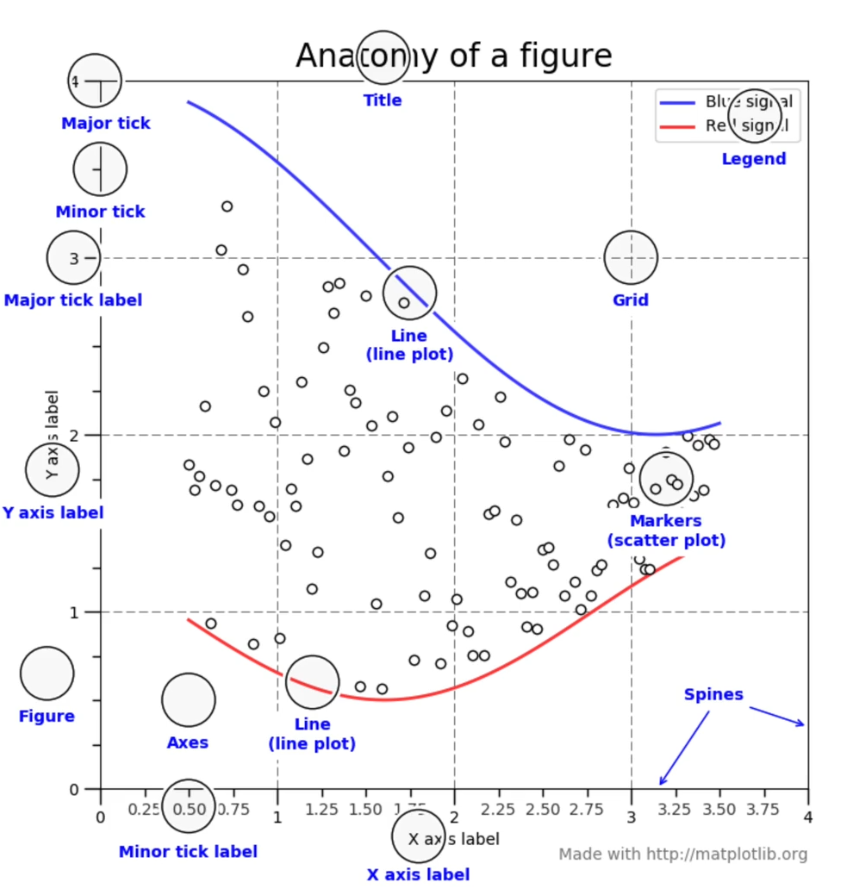 

## Bodový graf

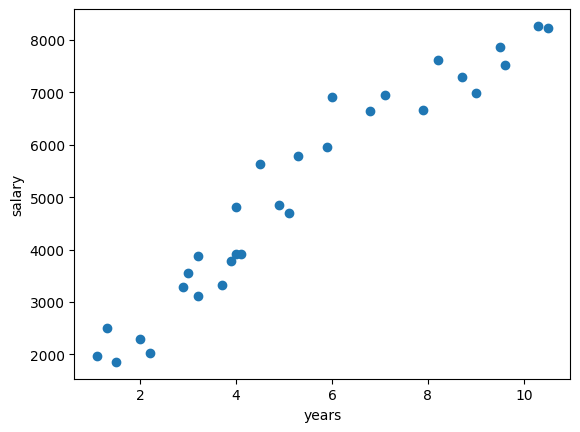

In [7]:
fig1 = plt.figure()                # vytvoření grafu
plt.scatter(inputs, targets)       # scatter - bodový graf
plt.xlabel("years")                # popis osy
plt.ylabel("salary")               # popis osy
plt.show()                         # zobrazení grafu

Pomocí knihovny numpy si vygenerujeme 50 náhodných bodů

In [10]:
x=np.random.randint(low=0, high=50, size=50)   
y=np.random.randint(0, 50, 50)

Graf lze zobrazit rovnou, pokud není třeba doplňovat dekorace.

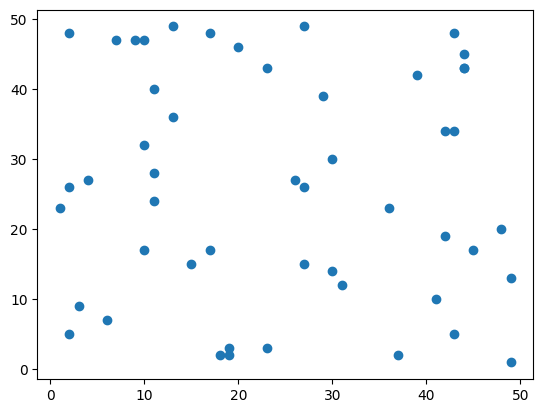

In [11]:
plt.scatter(x, y)

Barva a tvar bodů lze definovat.

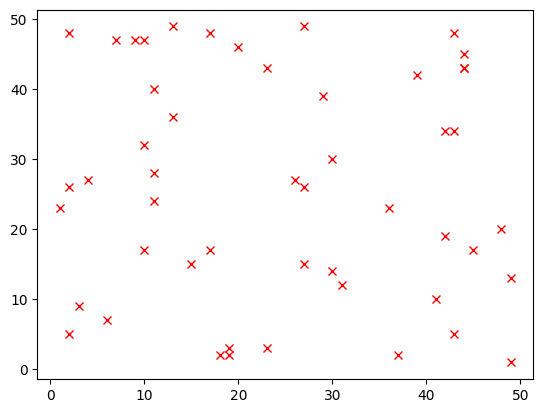

In [12]:
plt.plot(x, y, "rx")

## Čárový graf - plot
Z obrazení náhodného čárového grafu

x souřadnice se doplní od 0 po 1

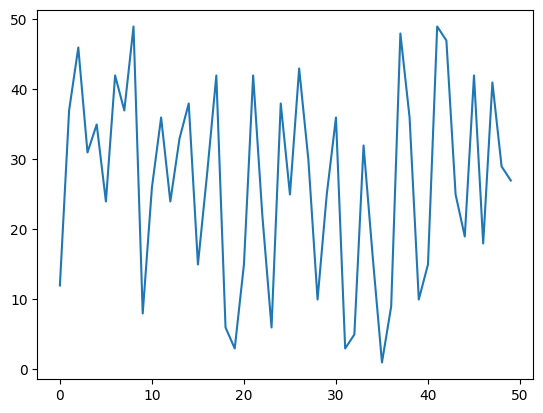

In [13]:
y=np.random.randint(0, 50, 50)
plt.plot(y)

Pospojování náhodných bodů

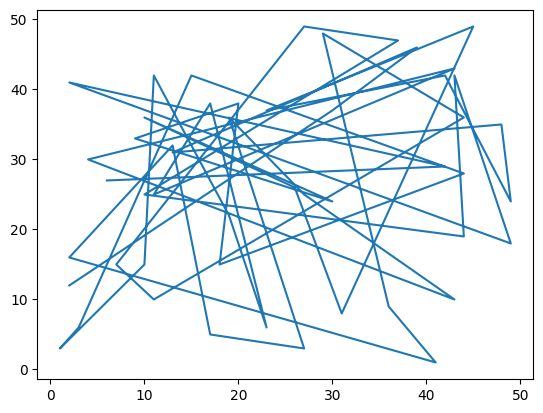

In [14]:
plt.plot(x, y)

## Kombinace více dat v grafu
V grafu může být více různých datových řad. 

Data inputs leží téměř v přímce. Doplníme si k nim ještě přesnou přímku. K tomu budeme potřebovat lineární funkci.

In [ ]:
def linear(x, a, b):
    """ Linear functions """
    return a*x + b

# setting the parameters of the linear function
a=740
b=1200

Funkce linspace vytvoří rovnoměrně rozdělenou posloupnost čísel mezi zadaným začátkem a koncem. Začneme hodnotou 0 a skončíme 11. Celkem vytvoříme 10 čísel v pravidelných rozestupech.

In [19]:
x=np.linspace(start=0, stop=11, num=10)  # vytvoření n pravidelnych vzdaleností v intervalu
print (x)

[ 0.          1.22222222  2.44444444  3.66666667  4.88888889  6.11111111
  7.33333333  8.55555556  9.77777778 11.        ]


Nyní vytvoříme graf, který bude obsahovat body zobrazené pomocí scatter.

Dále bude obsahovat plot, kde souřadnice x bodů budeme brát z linspace. y souřadnice bodů si dopočítáme pomocí linearní funkce.

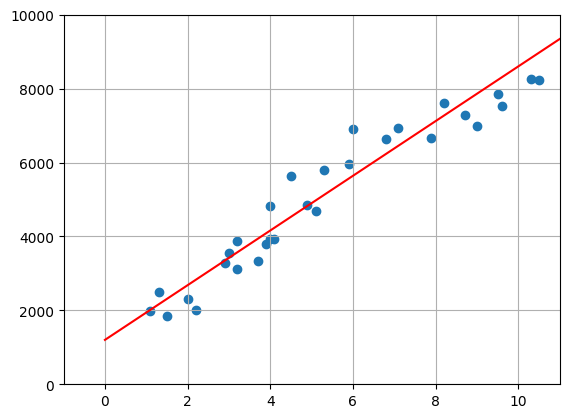

In [20]:
fig2 = plt.figure()
plt.scatter(inputs, targets)               # scatter - vykreslení bodů
plt.plot(x, linear(x, a, b), color='red')  # plot - vykreslení propojených bodů
plt.ylim(-1, 10000)                        # omezení osy y
plt.xlim(-1, 11)                           # omezení osy x
plt.grid()                                 # zobrazení mřížky
plt.show()

## Sloupcový - bar
Můžeme vyzkoušet, jestli generátor pseudonáhodných čísel vrací čísla přibližně rovnoměrně rozdělená.

Pro vygenerování náhodných dat použijeme knihovnu numpy. Četnosti hotnot rozdělíme do 3 proměnných.

In [30]:
x=np.random.randint(0, 100, 10000)
A = np.sum(x < 33)
B = np.sum((x >= 33) & (x < 66))
C = np.sum(x >= 66)
print (A, B, C)

3378 3310 3312


<BarContainer object of 3 artists>

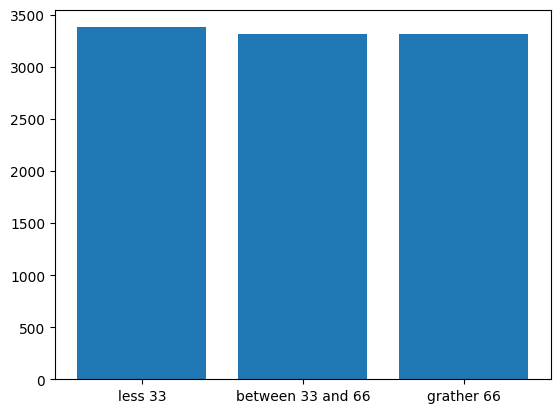

In [34]:
plt.bar (["less 33", "between 33 and 66", "grather 66"], [A, B ,C])

## Histogram - hist
Podobného výsledku se můžeme dopracovat pomocí funkce historamu. Ta zobrazí četnosti v definovaném počtu intervalů.

(array([1001.,  995., 1037., 1096.,  987.,  983.,  986.,  938.,  967.,
        1010.]),
 array([ 0. ,  9.9, 19.8, 29.7, 39.6, 49.5, 59.4, 69.3, 79.2, 89.1, 99. ]),
 <BarContainer object of 10 artists>)

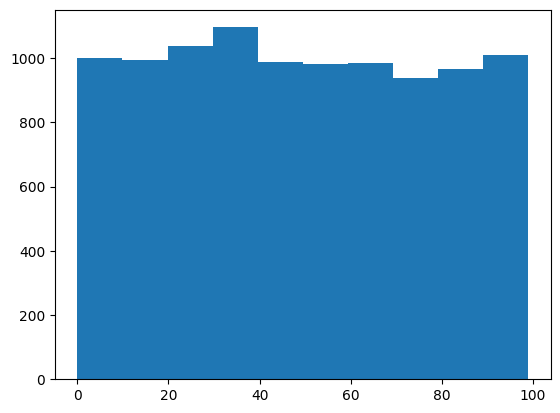

In [35]:
plt.hist(x, 10)

## Obrázky - imshow
Někdy se může hodit zobrazení obrázku načteného ze souboru.

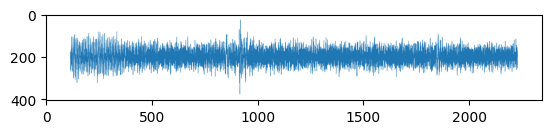

In [36]:
img = mpimage.imread ("..\dataset\signal.png")
plt.imshow(img)

Obrázek nemusí být uložený v souboru, ale může ho reprezentovat matice. 

Pořadí os se odvíjí od použití
* width x height x channels - matice pixelů je lepší pro matplotlib
* channels x width x height - je naopak vhodná pro umělé neuronové sítě
* rozsah hodnot 0 - 255, 0 - 1

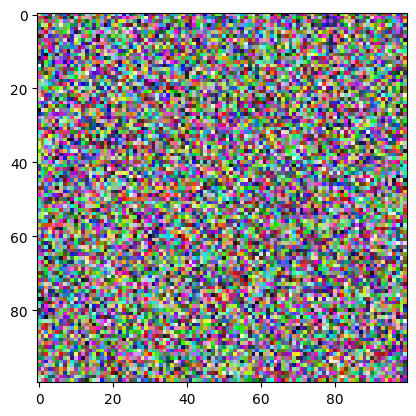

In [37]:
img = np.random.rand(100, 100, 3)
plt.imshow(img)

## Matice - matshow
Někdy je potřeba zobrazit matic čísel jako barevnou škálu. Například pro zdůraznění vychýlených hodnot.

K tomu lze použít matshow. Kdy si lze volit barevné schémata (iridis, inferno, magma, ...). 

Zpravidla světlejší barva ukazuje na vyšší hodnotu.

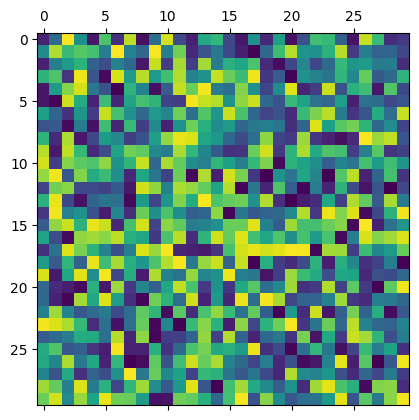

In [38]:
matice = np.random.rand(30, 30)
plt.matshow(matice)

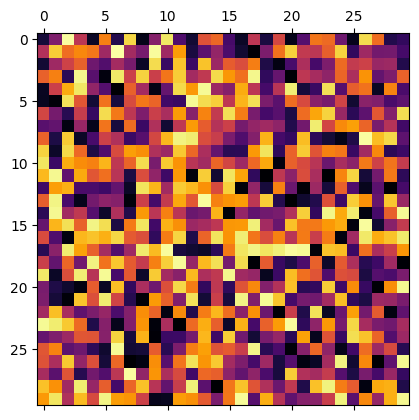

In [39]:
plt.matshow(matice, cmap="inferno")

## Koláč - pie
Oblíbeným grafem pro manažery a neoblíbeným pro statistiky je koláčový graf.

([<matplotlib.patches.Wedge at 0x217b08f67f0>,
 [Text(0.15654621983618647, 1.088803600772426, 'A'),
  Text(-0.7858324260104415, -0.9068998832454134, 'B'),
  Text(0.9253791095416961, -0.5947045515411984, 'C')],
 [Text(0.08538884718337443, 0.593892873148596, '45%'),
  Text(-0.45840224850609085, -0.5290249318931577, '36%'),
  Text(0.5047522415681978, -0.32438430084065367, '18%')])

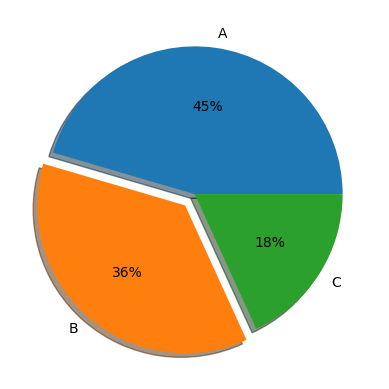

In [40]:
plt.pie ([50, 40, 20], explode=[0, 0.1, 0], labels=["A", "B", "C"], autopct="%i%%", shadow=True)

## Úpravy grafu

Velikost obrázku lze nastavit pomocí figsize.

Pozor velikost obrazku se udává v palcích.

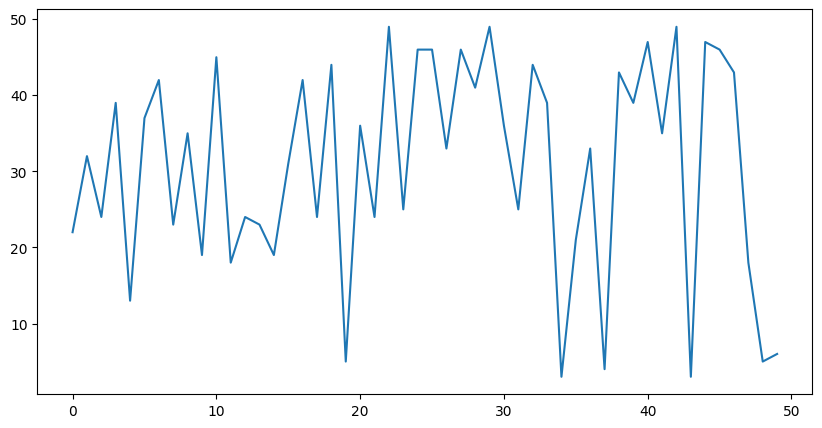

In [41]:
y = np.random.randint(0, 50, 50)
plt.figure (figsize=(10, 5))
plt.plot(y)

Připravíme si funkci pro výpočet klouzavého průměru, abychom mohli ukázat různé styly čáry.

Odkomentováním řádků můžete experimentovat.

In [44]:
def moving_average (a, n=3):
    ret = np.cumsum (a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n -1:] /n

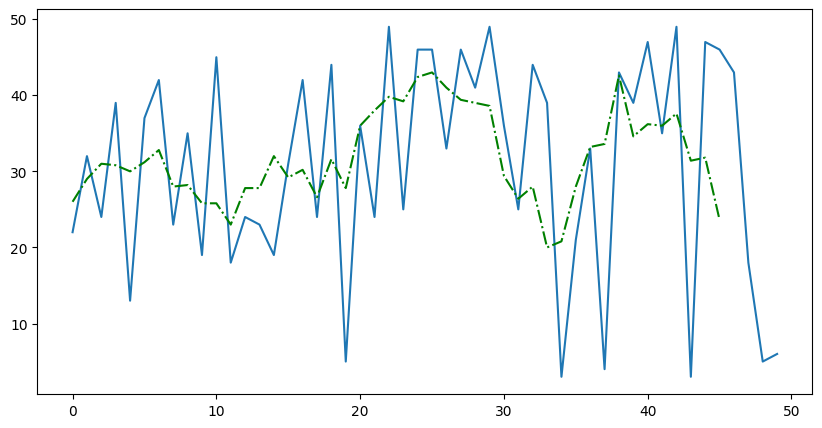

In [ ]:
AVG = moving_average(y, 5)
plt.figure (figsize=(10, 5))
plt.plot(y)
plt.plot(AVG, "r--")
#plt.plot(AVG, "r:")
#plt.plot(AVG, "g-.")
#plt.plot(AVG, "r-.+")
#plt.plot(AVG, "r-.*")
#plt.plot(AVG, "r-.o")

Pokud děláme graf do nějaké práce je vhodné o doplnit o:
* label - název grafu
* plot.label - popis datových řad
* legend - popisy datových řad se zobrazí v legendě
* xlabel, ylabel - popis os
* grid - zobrazení mřížky
* text - do grafu můžete vkládat vlastní text
* annotate - k výrazným bodům (minimum) můžete doplnit vysvětlení

Možností, jak graficky upravit graf, je mnohem více.

Text(31, 19.8, 'min')

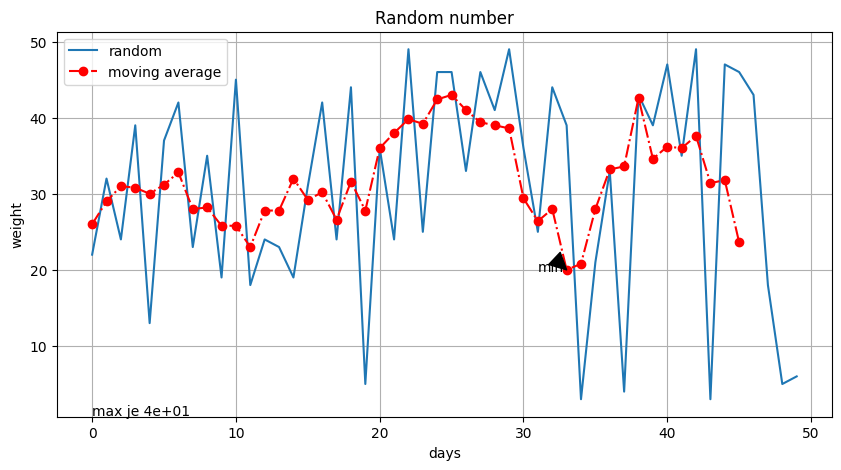

In [49]:
AVG = moving_average(y, 5)
plt.figure (figsize=(10, 5))

plt.title ("Random number")                      # název grafu

plt.plot(y, label="random")                      # label - popis řady
plt.plot(AVG, "r-.o", label="moving average")

plt.legend()

plt.xlabel("days")                               # popis osy
plt.ylabel("weight")                             # popis osy

plt.grid(True)                                   # mřížka

maxx=AVG.max()
miny=AVG.min()
minx=AVG.argmin()

plt.text (0, 0.9, f"max je {maxx:.1}")           # vložení textu
plt.annotate("min", xy=(minx, miny), xytext=(minx-2, miny-0.2), arrowprops={"color":"black"})    # vložení šipky

## Subplots
Někdy se stává, že v rámci jednoho obrázku chcete vytvořit více grafů.

V tom případě vytváříte grafy jako subplots.
* V následujícím příkladu vytvoříme obrázek o velikosti 10x10 palců.
* Obrázek bude rozdělen na 2 grafy, které budou ležet pod sebou (2, 1)
* Pole axes obsahuje jednotlivé podgrafy. Pro jednodušší přístup si odkazy na jednotlivé grafy můžeme uložit do proměnných ax1, ax2
* ax1 je jednoduchý scatter graf
* ax2 obsahuje datovou řadu y a klouzavý průměr AVG

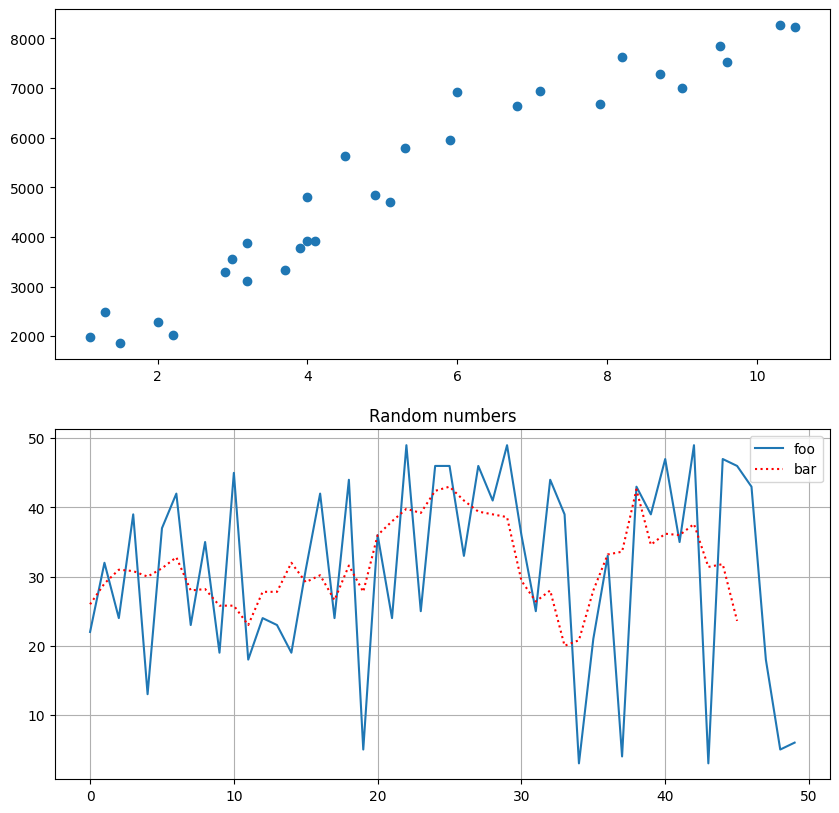

In [50]:
fig = plt.figure (figsize=(10, 10))
axes = fig.subplots (2, 1)
ax1 = axes[0]
ax2 = axes[1]

ax1.scatter(inputs, targets)

ax2.plot(y)
ax2.plot(AVG, "r:")
ax2.legend(["foo", "bar"])
ax2.set_title("Random numbers")
ax2.set_xlabel="days"
ax2.set_ylabel="weight"
ax2.grid(True)

## 3D grafy
Pokud máme vícerozměrná data, může být dobré je zobrazit ve 3D grafu.

Matplot toto umí následovně:

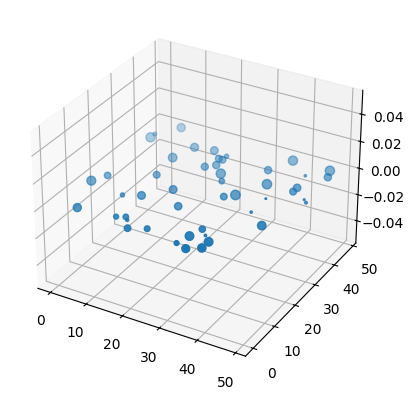

In [51]:
x1 = np.random.randint(0, 50, 50)
x2 = np.random.randint(0, 50, 50)
y = np.random.randint(0, 50, 50)

fig=plt.Figure()
ax = plt.axes(projection = '3d')
plt.scatter(x1, x2, y)
plt.show()

Některé knihovny jako plotly, umožňují udělat 3D graf interaktivní.

In [57]:
import plotly.graph_objects as go 
fig = go.Figure(layout=go.Layout(width=1000, height=1000))
fig.add_trace(go.Scatter3d(
    x=x1, y=x2, z=y,
    mode='markers',
    marker=dict(size=5, color=y, colorscale='Viridis', opacity=0.8),
    name="Data"
))

fig.show()

## Boxplot
Boxplot (krabicový graf) se používá pro zobrazení rozložení dat – ukazuje median, kvartily, rozsah a odlehlé hodnoty.

* čára uvnitř krabice = medián 
* okraje krabice = 1. a 3. kvartil (Q1 a Q3)
* „vousy“ (whiskers) = typicky hodnoty v intervalu [Q1 − 1.5·IQR, Q3 + 1.5·IQR]
* body mimo vousy = odlehlé hodnoty (outliers)

In [62]:
import sqlite3
cur = sqlite3.connect ("..\\dataset\\database.db")
points = pd.read_sql_query ("SELECT * FROM points", cur)
points

,NAME,CATEGORY,POINTS,ID,DATE
0,Novák,1,10.0,1,2020-01-10
1,Dvořák,1,15.0,2,2020-10-05
2,Tučný,1,7.0,3,2021-05-31
3,Prokop,2,9.0,4,2021-06-28
4,Kovář,2,1.0,5,2023-07-08
5,Brož,2,25.0,6,2021-06-15
6,Dlouhý,3,6.0,7,2023-08-10
7,Blažek,3,NaN,8,2023-12-31


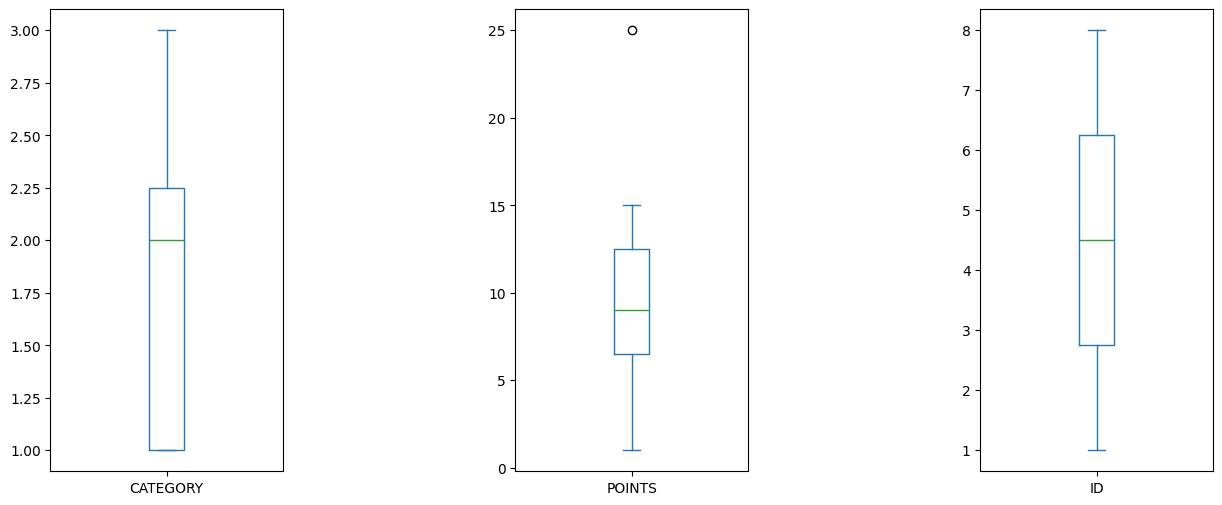

In [63]:
points.plot(
    kind='box', 
    subplots=True, 
    sharey=False, 
    figsize=(15, 6)
)
plt.subplots_adjust(wspace=1) 
plt.show()